# Implementation of a shallow Neural Network for classification of 2D data.

Author: **Eugene Klyshko**

Adapted from Erick Spence's lectures ["Introduction to Neural Network programming"](https://support.scinet.utoronto.ca/education/go.php/363/index.php)

[The overview](#linkOverview)   
[Example 1: Logistic regression](#linklr)  
[Example 2: Shallow NN with 3 layers](#linknn)  


<a id='linkOverview'></a>
**Given:** Array of x,y coordinates of points on the 2D plane. Each point is assigned a class [0 or 1].

**Need:** To build a model that can predict a class for a new point on the plane, based on given data

**Remember:** Logistic regression is a very simple NN with two layers (input and output, no hidden) aka one neuron, or perceptron. Input consists of 2 nodes (x, y coordinates) and output is a 1 or 0 class.

### In this notebook we will implement:
- logistic regression and 
- neural network with 3 layers (one input, one output, one hidden).

#### Architecture and hyperparameters: 
- Activation function: sigmoid: $\sigma\left(z\right) = \frac{1}{1+\exp({-z})}$
- Cost function: quadratic: $C = \frac{1}{2}\sum_{i}{\left(f\left(w\cdot x_i + b\right) - v_i\right)^2}$, where $i = 1,2,..., N$ data points, $v_i$ is the true class, $f(z)$ is an activation function and $x_i$ is a vector of features. 

## Example 1: <a id='linklr'></a>

### Let's create a logistic regression perceptron

<img src="pics/neuron.png" width="40%">

In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.dpi'] = 90
plt.rcParams['figure.figsize'] = (6,5)

#### Sigmoid function and it's derivative

In [3]:
def sigma(z):
    return 1./(1. + np.exp(-z))

def sigmaprime(z):
    return sigma(z)*(1. - sigma(z))

#### How do they look like?

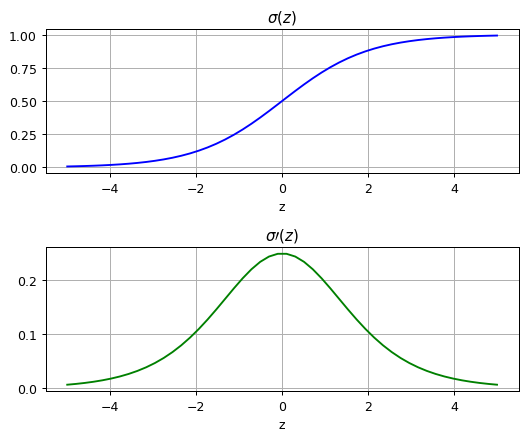

In [4]:
z_values = np.linspace(-5, 5)
plt.subplot(211)
plt.plot(z_values, sigma(z_values), 'b-')
plt.title(r'$\sigma(z)$')
plt.xlabel('z')
plt.grid()
plt.subplot(212)
plt.plot(z_values, sigmaprime(z_values), 'g-')
plt.title(r'$\sigma\prime(z)$')
plt.xlabel('z')
plt.grid()
plt.tight_layout()
plt.show()

Model consists of set of weights and biases for one layer, so we will use a python dictionary to describe a model
- let's also initialize a model randomly

In [5]:
model = {'w1': npr.random(), 'w2': npr.random(), 'b': npr.random()}

Function predict(), that will take data and predict an output:

In [6]:
def z(x, model):
    return model['w1'] * x[:,0] + model['w2'] * x[:,1] + model['b']

def predict(x, model):
    # Return activation
    return sigma(z(x, model))

The predict( ) function runs the data through a forward pass of the
neural network, and returns the output.  
**Inputs:**
- x: 2D array of floats of shape (num_points, 2), containing the
  2D position of the data points.  num_points is the number of
  data points. 
- model: dictionary containing the model parameters.

**Outputs:**
- vector of floats of length num_points (kind of probability to be in class 1).

In [7]:
def cost(x, y, model):
    """
    Quadratic cost function
    """
    return 0.5*np.sum((predict(x, model) - y)**2)


This function **train_model( )** uses gradient descent to update the neural network's
model parameters, minimizing the quadradic cost function.  It
returns the best model.
**Inputs:**
- x: 2D array of floats of shape (num_points, 2), containing the
  2D position of the data points.  num_points is the number of
  data points. 
- y: integer vector of length num_points, containing the correct
  values (0 or 1) for the data. 
- eta: float, the stepsize parameter for the gradient descent.
- num_steps: integer, number of steps to iterate through the
  training data for gradient descent.
- print_best: boolean, if True, print the model accuracy every
  1000 iterations.
  
**Outputs:**
- dictionary containing the parameters of the best model
- values of cost function at every iteration
- values of score at every iteration


In [8]:
def train_model(model, x, y, eta = 0.001, num_steps = 10000, print_best = True):
    cost_f = np.empty(num_steps)
    score_f = np.empty(num_steps)
    best = 0
    
    for i in np.arange(0, num_steps):
        
        # Calculate the derivatives of cost function.
        coeff = (predict(x, model) - y) * sigmaprime(z(x, model))
        dCdw1 = np.sum(coeff * x[:, 0])
        dCdw2 = np.sum(coeff * x[:, 1])
        dCdb  = np.sum(coeff)

        # Update the parameters
        model['w1'] -= eta * dCdw1
        model['w2'] -= eta * dCdw2
        model['b']  -= eta * dCdb

        # Check to see if this is our best model yet.
        predicted_y = np.round(predict(x, model))
        score = sum(predicted_y == y) / float(y.shape[0]) * 100
        score_f[i] = score
        
        #Find the value of cost function
        cost_f[i] = cost(x, y, model)
        
        
        # Keep the best model.
        if (score > best):
            best, bestmodel = score, model.copy()

        # Optionally print the score.
        if (print_best) and (i % 100 == 0):
            print("Best by step %i: %.1f %%" % (i, best))
     
    print("Our best model gets %.1f percent correct!" % best)
    
    return bestmodel, score_f, cost_f

#### OK! 
All the functions are implemented. Let's see how it goes. We need to create some data and check the model

In [9]:
import sklearn.datasets as skd
import sklearn.model_selection as skms

### Generating 500 points localized in two blobs and split them to train and test parts

In [10]:
N = 500
X, y = skd.make_blobs(N, centers=2, center_box = (-3, 3))
data = x_train, x_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.2)

Two functions to plot the data with adjacent labels and to plot decision boundaries

In [11]:
def plot_data(x_train, x_test, y_train, y_test):
    """
    This function generates a scatter plot of train data with labels corresponding to different colors,
    it also creates a scatter plot of test data in aqua color
    """
    plt.scatter(x_train[:, 0], x_train[:, 1], marker='.', c=y_train, s=300)
    plt.scatter(x_test[:, 0], x_test[:, 1], marker='.', color='aqua', s=100)
    plt.grid()
    plt.show()

def plot_decision_boundary(data, model, predict_function, **kwargs):
    """
    This function generates a plot of the model's decision boundary,
    and then scatter plots the data on top of it.
    Inputs:
    - data - a tuple of 4 arrays - x_train, x_test, y_train, y_test.
    - model: dictionary containing the model parameters.
    - predict_function: name of the function used to run the forward
      pass of the model.
    Outputs: nothing returned.
    """
    x_train, x_test, y_train, y_test = data
    x = np.append(x_train, x_test, axis=0)
    y = np.append(y_train, y_test, axis=0)
    
    # Set min and max values and give it some padding
    if 'x_min' in kwargs: x_min = kwargs['x_min']
    else: x_min = x[:, 0].min() * 1.1

    if 'x_max' in kwargs: x_max = kwargs['x_max']
    else: x_max = x[:, 0].max() * 1.1
    
    if 'y_min' in kwargs: y_min = kwargs['y_min']
    else: y_min = x[:, 1].min() * 1.1
   
    if 'y_max' in kwargs: y_max = kwargs['y_max']
    else: y_max = x[:, 1].max() * 1.1

    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Join the x and y positions.
    c = np.c_[xx.ravel(), yy.ravel()]

    # Calculate the model values for the whole grid.  Round to the
    # nearest integer.
    yp = np.round(predict_function(c, model))
    yp = yp.reshape(xx.shape)

    # Plot the model contour and training data.
    plt.contourf(xx, yy, yp, cmap = plt.cm.Spectral)
    plot_data(*data)

    plt.show()

I want to see what kind of data I have:

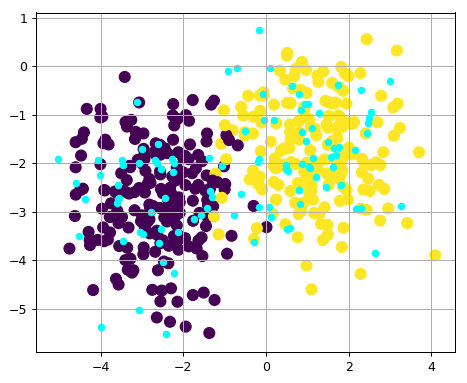

In [12]:
plot_data(*data)

#### I want to see what kind of classificator my randomly initialized model suggests

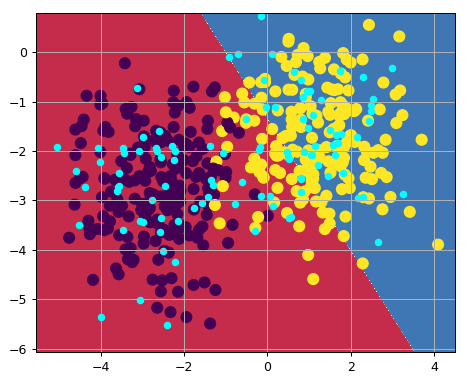

In [13]:
model = {'w1': npr.random(), 'w2': npr.random(), 'b': npr.random()}
plot_decision_boundary(data, model, predict)

### Train the model: 
- update weights and biases using gradient descent
- save the best possible model with highest score and lowest cost

In [14]:
best_model, score_, cost_ = train_model(model, x_train, y_train, eta=0.02, num_steps=1000)
print(best_model)

Best by step 0: 97.0 %
Best by step 100: 97.2 %
Best by step 200: 97.2 %
Best by step 300: 97.2 %
Best by step 400: 97.2 %
Best by step 500: 97.2 %
Best by step 600: 97.2 %
Best by step 700: 97.2 %
Best by step 800: 97.2 %
Best by step 900: 97.2 %
Our best model gets 97.2 percent correct!
{'w1': 2.309008771227977, 'w2': 0.12362719753977298, 'b': 2.0296644192860676}


#### Let's look at how Cost function dropped with iterations and how Score increased

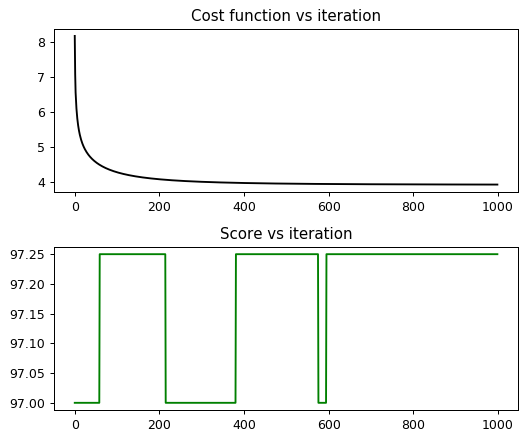

In [15]:
plt.subplot(211)
plt.plot(cost_, color='k')
plt.title('Cost function vs iteration')
plt.subplot(212)
plt.plot(score_, color='g')
plt.title('Score vs iteration')
plt.tight_layout()
plt.show()

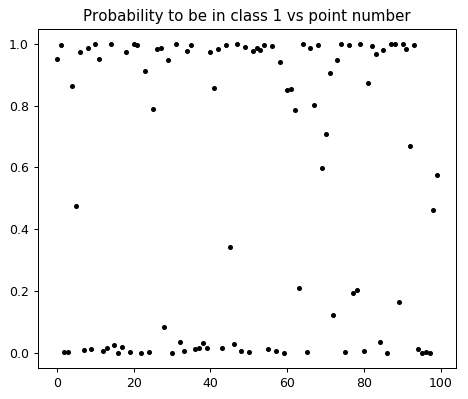

98.0


In [16]:
probabilities = predict(x_test, best_model)
predic_y = np.round(probabilities)
plt.plot(probabilities, 'k.')
plt.title('Probability to be in class 1 vs point number')
plt.show()
score = sum(predic_y == y_test) / float(y_test.shape[0]) * 100
print(score)

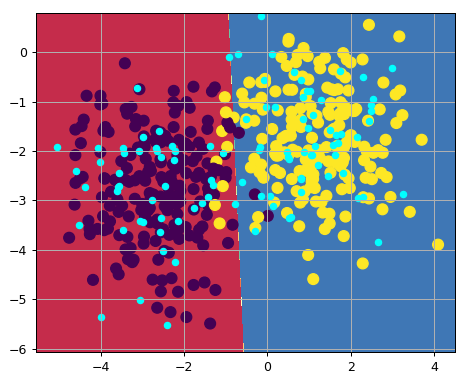

In [17]:
plot_decision_boundary(data, best_model, predict)

### Good job every one!  For linearly separated data classification works pretty well. What if data looks like this?

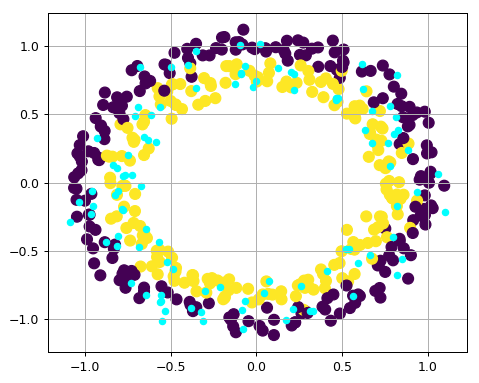

In [18]:
X, y = skd.make_circles(N, noise=0.06)
data = x_train, x_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.2)
plot_data(*data)


Let's remember https://en.wikipedia.org/wiki/Universal_approximation_theorem

<blockquote>

Let $\varphi:\mathbb{R}\to\mathbb{R}$ be a nonconstant, bounded, and continuous function. Let $I_m$ denote the ''m''-dimensional unit hypercube $[0,1]^m$. The space of real-valued continuous functions on $I_m$ is denoted by $C(I_m)$. Then, given any $\varepsilon>0$ and any function $f\in C(I_m)$, there exist an integer $N$, real constants $v_i,b_i\in\mathbb{R}$ and real vectors $w_i \in \mathbb{R}^m$ for $i=1,\ldots,N$, such that we may define:
$
  F( x ) =
  \sum_{i=1}^{N} v_i \varphi \left( w_i^T x + b_i\right)
$

as an approximate realization of the function $f$; that is,

$
  | F( x ) - f ( x ) | < \varepsilon
$

for all $x\in I_m$. In other words, functions of the form $F(x)$ are dense in $C(I_m)$.
</blockquote>

### What are we trying to accomplish?
- Just like with our first example, we want to create a network which, given a 2D position, can correctly classify the data point (0 or 1).
- However, obviously a linear fit will not work in this case.
- This time we will create a network with three layers, an input layer, one hidden layer, and an output layer.
- We will use the sigmoid function for all neurons, with the 2 values of the position variable, (x1, x2), as the inputs to the hidden layer, and the outputs of the hidden layer as inputs to the output layer.
- Once again, we’ll use gradient descent to minimize the cost function, to find the best values of our weights and biases.

## Example 2: <a id='linknn'></a>

### We will create a network with three layers, an input layer, one hidden layer, and an output layer.

<img src="pics/NN.png" width="40%">

### This function runs a forward pass of the data through the neural network, and returns the values which were calculated along the way.

**Inputs:**

- x: 2D array of floats of shape (num_points, input_dims),
  containing the data to be input to the network.  num_points is
  the number of data points.  input_dims is the dimension of the
  input data.
- model: dictionary containing the model parameters.  These model
  parameters should include:
- 'w1': 2D array of floats of shape (num_nodes, input_dim).
  These are the weights for the hidden layer.
- 'b1': 2D array of floats of shape (num_nodes, 1).  These are
  the biases for the hidden layer.  The superfluous extra
  dimension is needed so that the biases can be seamlessly
  added to the weights-data product.
- 'w2': 2D array of floats of shape (output_dim, num_nodes).
  These are the weights for the output layer.
- 'b2': 2D array of floats of shape (output_dim, 1).  These are
  the biases for the output layer.

**Outputs:**

- z1, z2, a1, a2, as a tuple.  These are 
- z1: 2D array of floats of shape (num_nodes, num_points),
  containing the value of the variable z to be input to the
  hidden layer.  num_nodes is the number of nodes in the
  hidden layer.
- z2: 2D array of floats of shape (output_dim, num_points),
  containing the value of the variable z to be input to the
  output layer.  output_dim is the output dimension of the
  network.
- a1: 2D array of floats of shape (num_nodes, num_points),
  containing the output of the hidden layer.
- a2: 2D array of floats of shape (output_dim, num_points),
  containing the output of the output layer.


In [19]:
def forward(x, model):
    # Forward propagation through the network.
    # First the hidden layer.
    z1 = model['w1'].dot(x.T) + model['b1']
    a1 = sigma(z1)

    # Then the output layer.
    z2 = model['w2'].dot(a1) + model['b2']
    a2 = sigma(z2)

    return z1, z2, a1, a2

The **predict( )** function runs the data through a forward pass of the
neural network, and returns the output.  For our second network
this means calculating the variable a2, and getting the maximum
output values for each data point.

**Inputs:**

- x: 2D array of floats of shape (num_points, input_dims),
  containing the data to be input to the network.
- model: dictionary containing the model parameters.

**Outputs:**
- vector of floats of length num_points.

In [20]:
def predict(x, model):
    # Run the data through the network, but we're only interested in
    # the output.
    _, _, _, a2 = forward(x, model)

    # Get the maximum value for each datapoint, and return it.
    return np.argmax(a2, axis = 0)

This function: **train_model( )** uses gradient descent to update the neural network's model parameters, minimizing the quadradic cost function.  It returns the best model.

**Inputs:**
- num_nodes: integer, number of nodes in the hidden layer.
- x: 2D array of floats of shape (num_points, input_dim),
  containing the input data.
- y: integer vector of length num_points, containing the correct
  values (0 or 1) for the data.
- eta: float, the stepsize parameter for the gradient descent.
- output_dim: integer, number of nodes in the output layer.
- num_steps: integer, number of steps to iterate through the
  training data for gradient descent.
- print_best: boolean, if True, print the model accuracy every
  1000 iterations.
- lam: float, regularization parameter.

**Outputs:**

- dictionary containing the parameters of the best model.

<img src="pics/bp1.png" width="80%">
<img src="pics/bp2.png" width="80%">

In [22]:
def train_model(num_nodes, x, y, eta, output_dim, num_steps = 10000, print_best = True, lam = 0.0):

    # Get the input dimension of the data.
    input_dim = np.shape(x)[1]
    
    # Initialize the parameters to random values. We need to learn
    # these.
    model = {'w1': npr.randn(num_nodes, input_dim),
             'b1': np.zeros([num_nodes, 1]),
             'w2': npr.randn(output_dim, num_nodes),
             'b2': np.zeros([output_dim, 1])}

    # A scaling factor used in determining the best model.
    scale = 100. / float(len(y))

    # Initialize the score of our best model.
    best = 0.0

    # Forward propagation.
    z1, _, a1, a2 = forward(x, model)
    
    # Gradient descent.
    for i in np.arange(0, num_steps):

        # Backpropagation
        # Here we subtract y, which is just 1, but only where y == 1.
        # This is the error in the final output (how wrong is it?).
        # (We should similarly subtract 0 where y == 0, but of course
        # this would not do anything.)
                         
        delta2 = a2
        delta2[y, range(len(y))] -= 1 # (a^M - y) v 
        delta1 = (model['w2'].T).dot(delta2) * sigmaprime(z1)

        # Calculate the derivatives.
        dCdb2 = np.sum(delta2, axis = 1, keepdims = True)
        dCdb1 = np.sum(delta1, axis = 1, keepdims = True)
        
        dCdw2 = delta2.dot(a1.T)
        dCdw1 = delta1.dot(x)

        # Gradient descent parameter update, with regularization.
        model['w1'] -= eta * (lam * model['w1'] + dCdw1)
        model['b1'] -= eta * dCdb1
        model['w2'] -= eta * (lam * model['w2'] + dCdw2)
        model['b2'] -= eta * dCdb2

        # Check to see if this is our best model yet.
        z1, _, a1, a2 = forward(x, model)
        score = sum(np.argmax(a2, axis = 0) == y) * scale
        
        # Keep the best model.
        if (score > best):
            best, bestmodel = score, model.copy()

        # Optionally print the score.
        if (print_best) and (i % 1000 == 0):
            print("Best by step %i: %.1f %%" % (i, best))
     
    print("Our best model gets %.1f percent correct!" % best)

    # Return the best parameters.
    return bestmodel

In [23]:
best_model = train_model(10, x_train, y_train, eta = 0.01, output_dim = 2)

Best by step 0: 52.2 %
Best by step 1000: 96.2 %
Best by step 2000: 96.5 %
Best by step 3000: 96.5 %
Best by step 4000: 96.5 %
Best by step 5000: 96.5 %
Best by step 6000: 96.5 %
Best by step 7000: 96.5 %
Best by step 8000: 96.5 %
Best by step 9000: 96.5 %
Our best model gets 96.5 percent correct!


In [27]:
y_predicted = predict(x_train, best_model)

In [28]:
y_predicted

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,

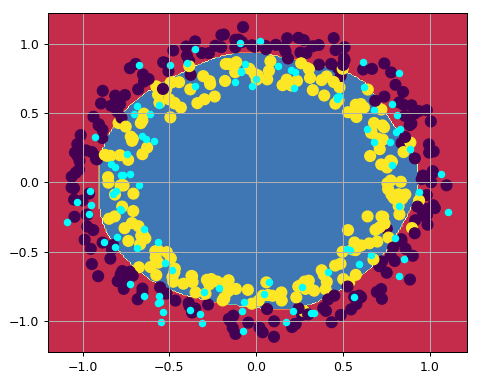

In [29]:
plot_decision_boundary(data, best_model, predict)